In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Timeline
from pyecharts.charts import Map 
import os

## Food Production Security Index

In the construction of the Food Production Security Index, we mainly consider comprehensively reflecting the grain production security situation from the following aspects：<p> 
* Grain yield: expressed as per capita share of grain.
* Grain cultivation situation: expressed as per capita sown area of grain.
* Agricultural technology level: expressed in terms of per capita total power of agricultural machinery and per capita application of agricultural fertilizers.
* Natural disaster impact: represented by the disaster rate of crops and land.
* Grain production cost: represented by producer price index.

In [2]:
szmj = pd.read_excel('Production Security.xlsx',sheet_name='Affected area of crops',index_col=0)#,names=col)
nyjx = pd.read_excel('Production Security.xlsx',sheet_name='Total power of agri machinery',index_col=0)#,names=col)
rjzy = pd.read_excel('Production Security.xlsx',sheet_name='Per capita share of grain',index_col=0)#,names=col)
lsmj = pd.read_excel('Production Security.xlsx',sheet_name='the acreage sown in grain crops',index_col=0)#,names=col)
jgzs = pd.read_excel('Production Security.xlsx',sheet_name='Cereal Producer Price Index',index_col=0)#,names=col)
nzwmj = pd.read_excel('Production Security.xlsx',sheet_name='Total sown area of crops',index_col=0)#,names=col)
hf = pd.read_excel('Production Security.xlsx',sheet_name='Agricultural fertilizer applica',index_col=0)#,names=col)
rk = pd.read_excel('Production Security.xlsx',sheet_name='Population data by province',index_col=0)#,names=col)

In [3]:
col = szmj.columns

In [4]:
#Missing value processing
szmj = szmj.fillna(0)        #The missing data in the affected area of crops is defaulted as not affected, represented by 0
jgzs['Xizang'] = jgzs['nationwide']      #The grain producer price index lacks data from Xizang and is estimated by the national average

In [5]:
var_sj = szmj/nzwmj  #Crop land damage rate 
var_js = nyjx/rk    #Total power of agricultural machinery per capita (kW per person)
var_cl = rjzy       #Grain production per capita (kg)
var_lsmj = lsmj/(10*rk)     #Grain sown area per capita (hectares per person)
var_cb = jgzs         #Cereal Producer Price Index represents the cost of grain production
var_hf = hf/rk        #Agricultural fertilizer application per capita (tons per person)

In [6]:
#Variable normalization, using Min Max normalization
var_sj1 = pd.DataFrame()
var_js1 = pd.DataFrame()
var_cl1 = pd.DataFrame()
var_lsmj1 = pd.DataFrame()
var_cb1 = pd.DataFrame()
var_hf1 = pd.DataFrame()

for i in col:
    var_sj1[i] = (var_sj[i]-var_sj.min(1)+var_sj.std(1))/(var_sj.max(1)-var_sj.min(1)+var_sj.std(1))    
    var_js1[i] = (var_js[i]-var_js.min(1)+var_js.std(1))/(var_js.max(1)-var_js.min(1)+var_js.std(1))
    var_cl1[i] = (var_cl[i]-var_cl.min(1)+var_cl.std(1))/(var_cl.max(1)-var_cl.min(1)+var_cl.std(1))
    var_lsmj1[i] = (var_lsmj[i]-var_lsmj.min(1)+var_lsmj.std(1))/(var_lsmj.max(1)-var_lsmj.min(1)+var_lsmj.std(1))
    var_cb1[i] = (var_cb[i]-var_cb.min(1)+var_cb.std(1))/(var_cb.max(1)-var_cb.min(1)+var_cb.std(1))
    var_hf1[i] = (var_hf[i]-var_hf.min(1)+var_hf.std(1))/(var_hf.max(1)-var_hf.min(1)+var_hf.std(1))

In [7]:
#Using a dictionary to save data for each region every year
years = var_sj.index
slides1 = {}

for i in years:
    slides1[i] = pd.DataFrame([var_sj1.loc[i],var_js1.loc[i],var_cl1.loc[i],var_lsmj1.loc[i],var_cb1.loc[i],var_hf1.loc[i]])

In [8]:
#CRITIC weighting method
W1 = {}

for i in years:
    W1[i] = np.array((slides1[i].T.std()*(1-slides1[i].T.corr()).sum())/((slides1[i].T.std()*(1-slides1[i].T.corr()).sum()).sum()))

In [9]:
#Weighted average each variable to calculate the Food Production Security Index for each region over the years
I1 = pd.DataFrame()

for i in years:
    I1[i] = (np.array(slides1[i].T)*W1[i]).sum(1)

I1.index = col
I1 = I1.T

In [10]:
I1.T

,2013,2014,2015,2016,2017,2018,2019,2020,2021
nationwide,0.530008,0.485366,0.494087,0.500818,0.537678,0.474422,0.446858,0.451745,0.422016
Beijing,0.357705,0.384882,0.227826,0.305189,0.229245,0.366356,0.260056,0.255473,0.429305
Tianjin,0.319485,0.334876,0.234502,0.239213,0.413213,0.418015,0.264168,0.279959,0.410439
Hebei,0.618308,0.554466,0.559238,0.508556,0.570730,0.484947,0.424062,0.441029,0.453017
Shanxi,0.594772,0.535215,0.511570,0.390334,0.443471,0.607527,0.644173,0.585962,0.590560
Inner Mongolia,0.625849,0.754945,0.778849,0.683196,0.708058,0.852381,0.690165,0.835694,0.722831
Liaoning,0.390995,0.594435,0.577686,0.448089,0.429677,0.589138,0.430201,0.598534,0.429354
Jilin,0.530804,0.663221,0.663174,0.593549,0.541062,0.825670,0.660666,0.793227,0.620095
Heilongjiang,0.652696,0.697523,0.695047,0.719194,0.685362,0.872877,0.752651,0.842946,0.689899
Shanghai,0.401910,0.240445,0.327173,0.413145,0.361998,0.262430,0.307031,0.221912,0.275275


In [11]:
province = {
    "上海市": "Shanghai",
    "云南省": "Yunnan",
    "内蒙古自治区": "Inner Mongolia",
    "北京市": "Beijing",
    "台湾省": "Taiwan",
    "吉林省": "Jilin",
    "四川省": "Sichuan",
    "天津市": "Tianjin",
    "宁夏回族自治区": "Ningxia",
    "安徽省": "Anhui",
    "山东省": "Shandong",
    "山西省": "Shanxi",
    "广东省": "Guangdong",
    "广西壮族自治区": "Guangxi",
    "新疆维吾尔自治区": "Xinjiang",
    "江苏省": "Jiangsu",
    "江西省": "Jiangxi",
    "河北省": "Hebei",
    "河南省": "Henan",
    "浙江省": "Zhejiang",
    "海南省": "Hainan",
    "湖北省": "Hubei",
    "湖南省": "Hunan",
    "澳门特别行政区": "Macao",
    "甘肃省": "Gansu",
    "福建省": "Fujian",
    "西藏自治区": "Xizang",
    "贵州省": "Guizhou",
    "辽宁省": "Liaoning",
    "重庆市": "Chongqing",
    "陕西省": "Shaanxi",
    "青海省": "Qinghai",
    "香港特别行政区": "Hong Kong",
    "黑龙江省": "Heilongjiang",
    "南海诸岛": "South China Sea Islands"
  }


In [12]:
#Visualization of Food Production Security Index
timeline1 = Timeline(init_opts=opts.InitOpts(width='1000px',height='700px'))

for i in range(len(years)):
    c = (
        Map()
        .add("Food Production Security Index", [list(z) for z in zip(col[1:], list(I1.iloc[i][1:].values))], "china",name_map=province)
        .set_global_opts(title_opts=opts.TitleOpts(title=str(years[i])),
        visualmap_opts=opts.VisualMapOpts(max_=I1.iloc[i][1:].values.max()))
    )
    timeline1.add(chart=c,time_point=years[i])

timeline1.render_notebook()

In [13]:
timeline1.add_schema(is_auto_play=True,play_interval=500)
timeline1.render(path='render1_eng.html')
os.system("render1_eng.html")

0

## Food Circulation Security Index

In terms of food circulation security, we mainly consider examining the situation of food circulation security from the following two aspects：<p> 
* Grain transportation situation: expressed in terms of railway freight volume, road freight volume, number of postal industry employees, railway mileage per capita, and road mileage per capita.
* Grain storage situation: represented by grain, cotton and other agricultural products storage (number of corporate units).

In [13]:
cc = pd.read_excel('Circulation Security.xlsx',sheet_name='Grain, cotton and other agricul',index_col=0,names=col[1:])
tlhy = pd.read_excel('Circulation Security.xlsx',sheet_name='Railway freight volume',index_col=0,names=col[1:])
glhy = pd.read_excel('Circulation Security.xlsx',sheet_name='Road freight volume',index_col=0,names=col[1:])
yzcy = pd.read_excel('Circulation Security.xlsx',sheet_name='Number of postal employees',index_col=0,names=col[1:])
tllc = pd.read_excel('Circulation Security.xlsx',sheet_name='Railway mileage per capita  ',index_col=0,names=col[1:])
gllc = pd.read_excel('Circulation Security.xlsx',sheet_name='Highway mileage per capita',index_col=0,names=col[1:])

In [14]:
#Missing value processing
#The missing values in agricultural product warehousing data are estimated using the average of the previous year and the following year's data
cc.iloc[1] = (cc.iloc[0]+cc.iloc[2])/2
cc.iloc[6] = (cc.iloc[5]+cc.iloc[7])/2

In [15]:
#Variable normalization, using Min Max normalization
var_cc = pd.DataFrame()   #Grain, cotton and other agricultural products storage (number of corporate units)
var_tlhy = pd.DataFrame()  #Railway freight volume (10,000 tons)
var_glhy = pd.DataFrame()   #Road freight volume (10,000 tons)
var_yzcy = pd.DataFrame()   #Number of postal employees (persons)
var_tllc = pd.DataFrame()   #Railway mileage per capita (km per 10,000 people)
var_gllc = pd.DataFrame()   #Highway mileage per capita (km per 10,000 people)

for i in col[1:]:
    var_cc[i] = (cc[i]-cc.min(1)+cc.std(1))/(cc.max(1)-cc.min(1)+cc.std(1))    
    var_tlhy[i] = (tlhy[i]-tlhy.min(1)+tlhy.std(1))/(tlhy.max(1)-tlhy.min(1)+tlhy.std(1))
    var_glhy[i] = (glhy[i]-glhy.min(1)+glhy.std(1))/(glhy.max(1)-glhy.min(1)+glhy.std(1))
    var_yzcy[i] = (yzcy[i]-yzcy.min(1)+yzcy.std(1))/(yzcy.max(1)-yzcy.min(1)+yzcy.std(1))
    var_tllc[i] = (tllc[i]-tllc.min(1)+tllc.std(1))/(tllc.max(1)-tllc.min(1)+tllc.std(1))
    var_gllc[i] = (gllc[i]-gllc.min(1)+gllc.std(1))/(gllc.max(1)-gllc.min(1)+gllc.std(1))

In [16]:
#Save data for each region every year
slides2 = {}

for i in years:
    slides2[i] = pd.DataFrame([var_cc.loc[i],var_tlhy.loc[i],var_glhy.loc[i],var_yzcy.loc[i],var_tllc.loc[i],var_gllc.loc[i]])

In [17]:
#CRITIC weighting method
W2 = {}

for i in years:
    W2[i] = np.array((slides2[i].T.std()*(1-slides2[i].T.corr()).sum())/((slides2[i].T.std()*(1-slides2[i].T.corr()).sum()).sum()))

In [18]:
#Weighted average each variable to calculate the Food Circulation Security Index for each region over the years
I2 = pd.DataFrame()

for i in years:
    I2[i] = (np.array(slides2[i].T)*W2[i]).sum(1)

I2.index = col[1:]
I2 = I2.T

In [19]:
I2.T

,2013,2014,2015,2016,2017,2018,2019,2020,2021
Beijing,0.292527,0.300339,0.301086,0.326769,0.296463,0.338385,0.371885,0.364201,0.371634
Tianjin,0.244392,0.240594,0.247377,0.261501,0.257215,0.256566,0.259103,0.265463,0.267151
Hebei,0.402858,0.396261,0.416857,0.442912,0.444400,0.456962,0.486297,0.470074,0.459328
Shanxi,0.452396,0.459505,0.466417,0.484987,0.491185,0.484198,0.477187,0.469783,0.475019
Inner Mongolia,0.572481,0.574163,0.575829,0.602380,0.608421,0.599691,0.586278,0.566158,0.581403
Liaoning,0.426484,0.412087,0.426933,0.443099,0.438979,0.438696,0.430852,0.424302,0.416987
Jilin,0.387644,0.384501,0.394518,0.425195,0.429545,0.426018,0.413951,0.399037,0.402703
Heilongjiang,0.393669,0.383676,0.392514,0.424438,0.463762,0.474090,0.469095,0.458687,0.463215
Shanghai,0.232300,0.233374,0.243415,0.259330,0.250875,0.243019,0.267622,0.283350,0.271883
Jiangsu,0.362438,0.352924,0.373075,0.414534,0.413056,0.401116,0.422409,0.421426,0.433504


In [20]:
#Visualization of Food Circulation Security Index
timeline2 = Timeline(init_opts=opts.InitOpts(width='1000px',height='700px'))

for i in range(len(years)):
    c = (
        Map()
        .add("Food Circulation Security Index", [list(z) for z in zip(col[1:], list(I2.iloc[i].values))],"china",name_map=province)
        .set_global_opts(title_opts=opts.TitleOpts(title=str(years[i])),
        visualmap_opts=opts.VisualMapOpts(max_=I2.iloc[i][1:].values.max()))
    )
    timeline2.add(chart=c,time_point=years[i])

timeline2.render_notebook()

In [22]:
timeline2.add_schema(is_auto_play=True,play_interval=500)
timeline2.render(path='render2_eng.html')
os.system("render2_eng.html")

0

##  Food Marketing Security Index

In terms of food marketing security, we mainly consider examining the sales safety of food from the following two aspects：<p> 
* Sales channels for grain: expressed in terms of the number of Taobao villages in each province.<p>
* Farmers' profit from selling grain: expressed in terms of net business income of rural residents and net profit per mu of grain.
    
    According to the report of Alibaba Research Institute, the identification criteria for Taobao Village mainly include: (1) business premises: in rural areas, administrative villages are the unit; (2) Sales scale: The annual sales volume of e-commerce reaches 10 million yuan; (3) Scale of online merchants: The number of active online stores in this village reaches 100, or the number of active online stores reaches 10% of the local household size.

In [21]:
tbc = pd.read_excel('Marketing Security.xlsx',sheet_name='Number of Taobao villages by pr',index_col=0,names=col[1:])
jysr = pd.read_excel('Marketing Security.xlsx',sheet_name='Net business income of rural re',index_col=0,names=col[1:])
lr = pd.read_excel('Marketing Security.xlsx',sheet_name='Grain net profit per mu',index_col=0,names=col)

In [22]:
#Missing value processing
#Missing data on the number of Taobao villages by province defaults to no Taobao villages, represented by 0
#A small portion of the regional data on net profit per mu of grain is missing and estimated using the national average level
#The data on net profit per mu of grain in 2021 is missing, and the degree of deviation from the national average is estimated using the data from 2020
tbc = tbc.fillna(0)
lr['Beijing'] = lr['nationwide']
lr['Tianjin'] = lr['nationwide']
lr['Shanghai'] = lr['nationwide']
lr['Xizang'] = lr['nationwide']
lr['Qinghai'] = lr['nationwide']

for i in range(1,len(lr.iloc[-1])):
    if pd.isna(lr.iloc[-1][i]):
        lr.iloc[-1][i] = lr.iloc[-1][0]+(lr.iloc[-2][i]-lr.iloc[-2][0])

In [23]:
#Variable normalization, using Min Max normalization
var_tbc = pd.DataFrame()  #Number of Taobao villages by province
var_jysr = pd.DataFrame()   #Net business income of rural residents (yuan)
var_lr = pd.DataFrame()   #Grain net profit per mu

for i in col[1:]:
    var_tbc[i] = (tbc[i]-tbc.min(1)+tbc.std(1))/(tbc.max(1)-cc.min(1)+tbc.std(1))    
    var_jysr[i] = (jysr[i]-jysr.min(1)+jysr.std(1))/(jysr.max(1)-jysr.min(1)+jysr.std(1))
    var_lr[i] = (lr[i]-lr.min(1)+lr.std(1))/(lr.max(1)-lr.min(1)+lr.std(1))

In [24]:
#Save data for each region every year
slides3 = {}

for i in years:
    slides3[i] = pd.DataFrame([var_tbc.loc[i],var_jysr.loc[i],var_lr.loc[i]])

In [25]:
#CRITIC weighting method
W3 = {}

for i in years:
    W3[i] = np.array((slides3[i].T.std()*(1-slides3[i].T.corr()).sum())/((slides3[i].T.std()*(1-slides3[i].T.corr()).sum()).sum()))

In [26]:
#Weighted average each variable to calculate the Food Marketing Security Index for each region over the years
I3 = pd.DataFrame()

for i in years:
    I3[i] = (np.array(slides3[i].T)*W3[i]).sum(1)

I3.index = col[1:]
I3 = I3.T

In [27]:
I3.T

,2013,2014,2015,2016,2017,2018,2019,2020,2021
Beijing,-0.169874,0.394781,0.343776,0.371973,0.398673,0.350756,0.373861,0.318669,0.329188
Tianjin,-0.086426,0.509005,0.487629,0.531620,0.566268,0.518507,0.506259,0.457984,0.455301
Hebei,-0.776878,0.657908,0.481419,0.535720,0.560558,0.512637,0.558776,0.548987,0.544527
Shanxi,-0.161364,0.371703,0.332472,0.382506,0.401315,0.372779,0.334921,0.352500,0.348061
Inner Mongolia,-0.049251,0.568382,0.559503,0.593864,0.612633,0.643358,0.689698,0.621044,0.625153
Liaoning,-0.052993,0.544509,0.506662,0.566162,0.602538,0.571726,0.600998,0.543730,0.539874
Jilin,-0.041171,0.569495,0.602182,0.628194,0.646911,0.631950,0.633557,0.594888,0.593080
Heilongjiang,-0.041119,0.583223,0.572968,0.578397,0.614967,0.597094,0.565271,0.513270,0.509505
Shanghai,-0.164771,0.379806,0.319176,0.338738,0.360461,0.334480,0.376486,0.327509,0.339834
Jiangsu,-0.713667,0.778145,0.718486,0.702930,0.719463,0.730386,0.720168,0.640445,0.622610


In [28]:
#Visualization of Food Marketing Security Index
timeline3 = Timeline(init_opts=opts.InitOpts(width='1000px',height='700px'))

for i in range(len(years)):
    c = (
        Map()
        .add("Food Marketing Security Index", [list(z) for z in zip(col[1:], list(I3.iloc[i].values))], "china",name_map=province)
        .set_global_opts(title_opts=opts.TitleOpts(title=str(years[i])),
        visualmap_opts=opts.VisualMapOpts(max_=I3.iloc[i][1:].values.max()))
    )
    timeline3.add(chart=c,time_point=years[i])

timeline3.render_notebook()

In [32]:
timeline3.add_schema(is_auto_play=True,play_interval=500)
timeline3.render(path='render3_eng.html')
os.system("render3_eng.html")

0

## Overall food security index by region

Weighted average of safety indices in production, circulation, and sales.


Among them, each region is divided into net grain output provinces and net grain input provinces based on grain supply. Provinces with net grain exports will place greater emphasis on food production safety, while provinces with net grain imports will place greater emphasis on food circulation safety.

In [29]:
#Grain demand (10000 tons)
d = pd.read_excel('Marketing Security.xlsx',sheet_name='Grain demand (10000 tons)',index_col=0,names=col[1:])
#Total Grain Production (10000 tons)
s = pd.read_excel('Marketing Security.xlsx',sheet_name='Total Grain Production (10000 t',index_col=0,names=col)

In [30]:
#Net grain output by province
nop = s[col[1:]]-d
(nop).T

,2013,2014,2015,2016,2017,2018,2019,2020,2021
Beijing,-817.65,-869.63,-878.24,-890.15,-902.32,-908.46,-912.90,-910.77,-903.47
Tianjin,-431.60,-438.47,-437.07,-424.09,-394.00,-384.99,-372.25,-368.21,-340.49
Hebei,231.16,211.31,205.45,288.95,643.33,507.72,536.99,586.38,622.46
Shanxi,-207.25,-186.24,-253.57,-192.52,-154.20,-125.46,-141.91,-76.40,-75.20
Inner Mongolia,1717.35,1699.93,1777.80,1732.82,2208.31,2511.84,2614.05,2630.81,2808.30
Liaoning,318.65,-120.04,137.16,239.99,476.54,347.27,590.89,509.15,720.23
Jilin,2403.76,2396.74,2523.41,2613.39,3067.82,2564.58,2825.26,2771.63,3017.95
Heilongjiang,4427.72,4690.76,4806.53,4569.41,5948.73,6076.19,6103.35,6177.27,6523.95
Shanghai,-938.44,-948.31,-944.84,-961.61,-960.58,-960.55,-970.93,-978.44,-976.27
Jiangsu,-99.56,-70.23,-14.15,-137.83,-11.09,28.52,64.53,83.99,88.95


In [31]:
sp = []
dp = []
for i in col[1:]:
    if nop[i].mean() >= 0:
        sp.append(i)
    else:
        dp.append(i)

In [32]:
sp #Net Grain Exporting Provinces

['Hebei',
 'Inner Mongolia',
 'Liaoning',
 'Jilin',
 'Heilongjiang',
 'Anhui',
 'Jiangxi',
 'Shandong',
 'Henan',
 'Hubei',
 'Hunan',
 'Gansu',
 'Ningxia',
 'Xinjiang']

In [33]:
dp  #Net Grain Input Provinces

['Beijing',
 'Tianjin',
 'Shanxi',
 'Shanghai',
 'Jiangsu',
 'Zhejiang',
 'Fujian',
 'Guangdong',
 'Guangxi',
 'Hainan',
 'Chongqing',
 'Sichuan',
 'Guizhou',
 'Yunnan',
 'Xizang',
 'Shaanxi',
 'Qinghai']

In [34]:
#Save data for each region every year
slides4 = {}

for i in years:
    slides4[i] = pd.DataFrame([I1[col[1:]].loc[i],I2.loc[i],I3.loc[i]])

In [35]:
#Calculate weights
W4 = pd.DataFrame()

for i in years:
    W4[i] = list((slides4[i].T.std()*(1-slides4[i].T.corr()).sum())/((slides4[i].T.std()*(1-slides4[i].T.corr()).sum()).sum()))

In [36]:
#Adjust the weights based on the different emphasis on grain production and circulation between provinces with net grain output and provinces with net grain input
a = 0.05           #Used to adjust the weights of net grain output provinces and net grain input provinces
W5 = {} 

for i in col[1: ]:
    if i in sp:
        W5[i] = np.array([W4.iloc[0]+a,W4.iloc[1]-a,W4.iloc[2]]).T
    else:
        W5[i] = np.array([W4.iloc[0]-a,W4.iloc[1]+a,W4.iloc[2]]).T

In [37]:
W5

{'Beijing': array([[0.11982405, 0.19195602, 0.68821992],
        [0.28247804, 0.22190478, 0.49561719],
        [0.27370622, 0.27921294, 0.44708084],
        [0.27661162, 0.32873614, 0.39465224],
        [0.25538964, 0.29434938, 0.45026098],
        [0.33653989, 0.24967766, 0.41378244],
        [0.31371865, 0.24673907, 0.43954228],
        [0.4133311 , 0.24628733, 0.34038157],
        [0.37257934, 0.2539887 , 0.37343195]]),
 'Tianjin': array([[0.11982405, 0.19195602, 0.68821992],
        [0.28247804, 0.22190478, 0.49561719],
        [0.27370622, 0.27921294, 0.44708084],
        [0.27661162, 0.32873614, 0.39465224],
        [0.25538964, 0.29434938, 0.45026098],
        [0.33653989, 0.24967766, 0.41378244],
        [0.31371865, 0.24673907, 0.43954228],
        [0.4133311 , 0.24628733, 0.34038157],
        [0.37257934, 0.2539887 , 0.37343195]]),
 'Hebei': array([[0.21982405, 0.09195602, 0.68821992],
        [0.38247804, 0.12190478, 0.49561719],
        [0.37370622, 0.17921294, 0.44708084],

In [38]:
#Weighted average the three indices to calculate the Overall food security index for each region over the years
I = pd.DataFrame(np.zeros((len(years),len(col[1:]))))

for i in range(len(years)):
    for j in range(len(col[1:])):
        I.iloc[i,j] = np.dot(slides4[years[i]][col[1:][j]],W5[col[1:][j]][i])

In [39]:
I.columns = col[1:]
I.index = years

In [40]:
I.T

year,2013,2014,2015,2016,2017,2018,2019,2020,2021
Beijing,-0.017897,0.371027,0.300120,0.338639,0.325318,0.352917,0.337671,0.303762,0.377270
Tianjin,0.025714,0.400255,0.351265,0.361939,0.436210,0.419287,0.369328,0.336986,0.390798
Hebei,-0.361699,0.586448,0.498930,0.504261,0.541598,0.492216,0.492406,0.482025,0.488162
Shanxi,0.047054,0.437375,0.418891,0.418361,0.438534,0.479600,0.467042,0.477883,0.470657
Inner Mongolia,0.156324,0.640443,0.644400,0.629455,0.645727,0.728069,0.674715,0.723201,0.664576
Liaoning,0.088697,0.547461,0.518916,0.493546,0.509318,0.559415,0.505369,0.554391,0.468721
Jilin,0.123995,0.582791,0.587759,0.568713,0.567048,0.685693,0.612548,0.668051,0.576531
Heilongjiang,0.151379,0.602614,0.586250,0.596207,0.610598,0.699073,0.628681,0.674518,0.587627
Shanghai,-0.020649,0.307945,0.300211,0.333215,0.328597,0.287397,0.327836,0.272987,0.298522
Jiangsu,-0.361126,0.584559,0.557752,0.541848,0.587197,0.527347,0.525972,0.467772,0.466809


In [41]:
#Visualization of the Overall food security index by region
timeline4 = Timeline(init_opts=opts.InitOpts(width='1000px',height='700px'))

for i in range(len(years)):
    c = (
        Map()
        .add("Overall food security index by region", [list(z) for z in zip(col[1:], list(I.iloc[i].values))], "china",name_map=province)
        .set_global_opts(title_opts=opts.TitleOpts(title=str(years[i])),
        visualmap_opts=opts.VisualMapOpts(max_=I.iloc[i][1:].values.max()))
    )
    timeline4.add(chart=c,time_point=years[i])

timeline4.render_notebook()

In [47]:
timeline4.add_schema(is_auto_play=True,play_interval=500)
timeline4.render(path='render4_eng.html')
os.system("render4_eng.html")

0

## National Overall food security index

Construct a national level food security index based on the food security index of each region. Assign weights based on the food supply of each region.

In [42]:
#Weighted average the food security index of each province based on the food supply of each province
IN = []

for i in range(len(years)):
    IN.append(np.dot(np.array(s[col[1:]].iloc[i]/s[col[1:]].iloc[i].sum()),np.array(I.iloc[i])))

In [43]:
IN

[-0.03402307027926639,
 0.5212407654999248,
 0.5041759680437474,
 0.5246183738113621,
 0.5522261258340738,
 0.5416438003774241,
 0.5289328391248562,
 0.5186846286087945,
 0.48417046123249474]

In [44]:
data = pd.read_excel('Comparative evaluation.xlsx',index_col=0)

In [45]:
data

,Retail Price Index of Grain Commodities,Average selling price of three types of grains per 50 kilograms (yuan)
years,,
2013,104.9,121.13
2014,103.1,124.38
2015,102.0,116.28
2016,100.4,108.40
2017,101.5,111.60
2018,100.7,109.70
2019,100.6,109.40
2020,101.2,122.50
2021,101.2,128.50


<Figure size 432x288 with 0 Axes>

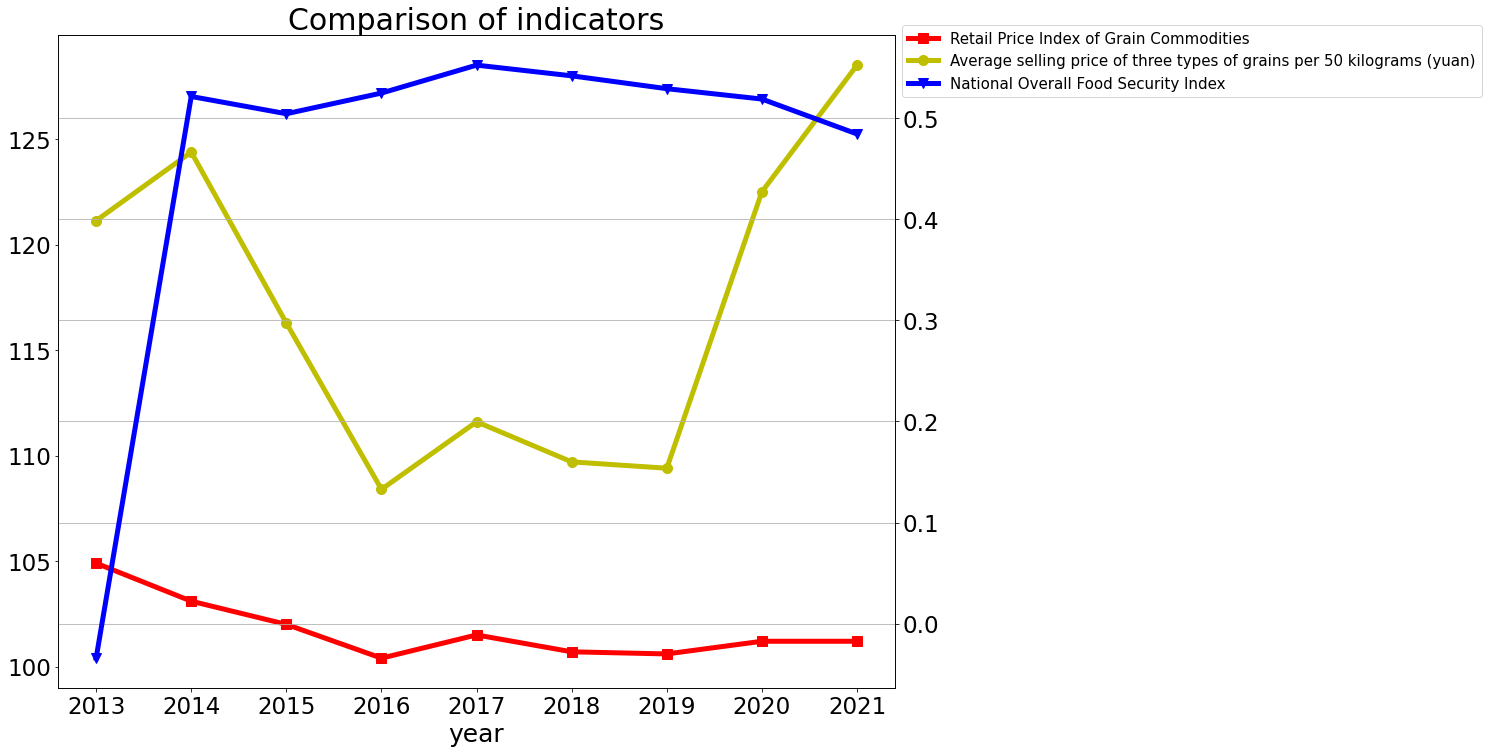

In [46]:
#Compare the trend of changes in the national food security index with the retail price index and average selling price of grain
plt.gcf().set_facecolor([0.8,0.8,0.8])
fig,ax1 = plt.subplots(figsize=(15,12))

ax1.plot(data['Retail Price Index of Grain Commodities'],marker='s',color='r',linewidth=5,markersize=10)
ax1.plot(data['Average selling price of three types of grains per 50 kilograms (yuan)'],marker='o',color='y',linewidth=5,markersize=10)

ax2 = ax1.twinx()
ax2.plot(years,IN,marker='v',color='b',linewidth=5,markersize=10)

fig.legend(['Retail Price Index of Grain Commodities','Average selling price of three types of grains per 50 kilograms (yuan)','National Overall Food Security Index'],loc=4,fontsize=15,bbox_to_anchor=(1.45,0.8))
plt.title('Comparison of indicators',size=30)
ax1.set_xlabel('year',size=25)
plt.grid(True)
ax1.tick_params(axis='x',labelsize=23)
ax1.tick_params(axis='y',labelsize=23)
ax2.tick_params(axis='y',labelsize=23)

plt.savefig('compare.jpg',bbox_inches = 'tight')
plt.show()